## En este notebook, creamos el módulo con todas las funciones.

In [1]:
%%writefile fotoapp.py

#----------------Bibliotecas-------------------
from PIL import Image,ImageFilter
import requests
from io import BytesIO
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

############################## Ejercicio nro. 1 #########################

# En esta función, determinamos una imágen para elegir la red social.
def look_image(nombre_imagen, red_social):
    # Dicionario de redes sociales
    sizes_redes = {'facebook': (1200, 630),
                   'twitter': (1024, 512),
                   'instagram': (1080, 566)}

    img = cv2.imread(nombre_imagen) # Lee la imágen original
    imagen = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convierte a la escala de colores conveniente
    # Crea el subplot para la imágen original
    plt.subplot(1, 2, 1)
    plt.imshow(imagen)
    plt.title('Imagen Original')
    plt.axis('off')

    size_redimen = sizes_redes.get(red_social.lower())

    if size_redimen:
        new_image = cv2.resize(imagen, size_redimen) # Redimesiona la imágen
        # # Crea el subplot para la imágen resimensionada
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.title(f'Imagen redimensionada ({red_social})')
        plt.axis('off')
        # Guarda la imágen redimensionada
        cv2.imwrite(f'Imagen para {red_social}.jpg', cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR))
    else:
        print('Red social incorrecta')

############################## Ejercicio nro. 2 #########################

# Función que ecualiza a traves de su histograma, la imágen 'robot'.
def equal_robot(imagen):
  img = cv2.imread(imagen, 0) # Lee la imágen, en blanco y negro
  equ = cv2.equalizeHist(img) # Proceso de ecualización
  hist,bins = np.histogram(img.flatten(),256,[0,256]) # Crea el histograma
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  ax = axes.ravel() # Convierte el array en unidimensional
  ax[0].imshow(img, cmap='gray') # Muestra la imágen original en escala de grises
  ax[0].set_title('imágen original')
  ax[1].imshow(equ, cmap='gray') # Muestra la imágen ecualizada en escala de grises
  ax[1].set_title('imágen ecualizada')
  cv2.imwrite('robot_imagen_original.png', img) # Guarda la imagen original
  cv2.imwrite('robot_imagen_ecualizada.png', equ) # Guarda la imagen ecualizada
  plt.show()


# Función que ecualiza a traves de su histograma, la imágen 'sotano'.
def equal_sotano(imagen):
  img2 = cv2.imread(imagen, 0)
  equ2 = cv2.equalizeHist(img2)
  hist,bins = np.histogram(img2.flatten(),256,[0,256])
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  ax = axes.ravel()
  ax[0].imshow(img2, cmap='gray')
  ax[0].set_title('imágen original')
  ax[1].imshow(equ2, cmap='gray')
  ax[1].set_title('imágen ecualizada')
  cv2.imwrite('sotano_imagen_original.png', img2)
  cv2.imwrite('sotano_imagen_ecualizada.png', equ2)
  plt.show()

############################## Ejercicio nro. 3 #########################

def seleccion_filtro():
    # Diccionario de filtros.
    filtros = {'BLUR': ImageFilter.BLUR,
               'CONTOUR': ImageFilter.CONTOUR,
               'DETAIL': ImageFilter.DETAIL,
               'EDGE ENHANCE': ImageFilter.EDGE_ENHANCE,
               'EDGE ENHANCE MORE': ImageFilter.EDGE_ENHANCE_MORE,
               'EMBOSS': ImageFilter.EMBOSS,
               'FIND EDGES': ImageFilter.FIND_EDGES,
               'SHARPEN': ImageFilter.SHARPEN,
               'SMOOTH': ImageFilter.SMOOTH}

    print('Elija de la siguiente lista, el filtro que desea aplicar a la imagen')
    print('BLUR \nCONTOUR \nDETAIL \nEDGE ENHANCE \nEDGE ENHANCE MORE \nEMBOSS \nFIND EDGES \nSHARPEN \nSMOOTH')
    filtro_elegido = input().upper()  # Convierte en mayúsculas para poder tomar los strings del diccionario.

    nueva_imagen(filtro_elegido, filtros) # Llamada a la segunda función.

def nueva_imagen(filtro_elegido, filtros):
    mascota = Image.open('gatito.jpg')

    print('Usted ha elegido el filtro: ' + filtro_elegido)
    print()

    # Si el filtro elegido está entre las posibles elecciones, filtra la imágen.
    if filtro_elegido in filtros:
        filtro = filtros[filtro_elegido]
        new_mascota = mascota.filter(filtro)
        display(new_mascota)
        new_mascota.save('Imágen_filtrada.jpg')
    else:
        print('El filtro elegido no pertenece a la lista de filtros')

    plt.imshow(mascota)
    plt.title("Imágen original")
    plt.axis('off')
    print('Esta es la imágen con los distintos filtros aplicados')
    print()

    # Diccionario para nombrar las distintas imágenes (subplots).
    nombres_filtros = {ImageFilter.BLUR: 'Blur',
                       ImageFilter.CONTOUR: 'Contour',
                       ImageFilter.DETAIL: 'Detail',
                       ImageFilter.EDGE_ENHANCE: 'Edge Enhance',
                       ImageFilter.EDGE_ENHANCE_MORE: 'Edge Enhance More',
                       ImageFilter.EMBOSS: 'Emboss',
                       ImageFilter.FIND_EDGES: 'Find Edges',
                       ImageFilter.SHARPEN: 'Sharpen',
                       ImageFilter.SMOOTH: 'Smooth'}

    # Itera aplicando todos los filtros a la misma imágen y los muestra.
    for i, (filtro, nombre_filtro) in enumerate(nombres_filtros.items()):
        mascota_filtrada = mascota.filter(filtro)
        plt.imshow(mascota_filtrada)
        plt.title('Filtro aplicado: ' + nombre_filtro)
        plt.axis('off')
        plt.show()

############################## Ejercicio nro. 4 #########################

# De las pruebas de distintos filtros para representar un boceto a partir de una imágen,
# Laplaciano y Canny sugieren una buena base para realizar un retrato, ya sea (a mi entender)
# como base para una pintura como para un dibujo.

def funcion_para_elegir():
  def crear_boceto():
    print('Imágen procesada con el operador Laplaciano')
    print()
    # Cargar la imagen en blanco y negro
    img = cv2.imread('mujer.jpg', 0)
    # En este caso no se aplica el suavizado porque hace a la imágen mas borrosa.
    # Aplicamos el operador Laplaciano para resaltar los bordes.
    img_bordes = cv2.Laplacian(img, cv2.CV_64F)
    # Esta función garantiza que los valores resultantes esten en el rango correcto
    # (0, 255), se conviertan a números enteros y sean adecuados para visualizar.
    img_bordes = cv2.convertScaleAbs(img_bordes)
    img_invertida = cv2.bitwise_not(img_bordes) # Invertir los colores (negro a blanco y viceversa)

    fig, axes = plt.subplots(1, 2, figsize=(10, 10)) # Se generan los subplots
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(img_invertida, cmap='gray')
    axes[1].set_title('Imagen Procesada')
    axes[1].axis('off')
    plt.show()
    return img_invertida

  imagen_procesada = crear_boceto()# Llama a la función.
  cv2.imwrite("imagen_procesada.jpg", imagen_procesada)# Guarda la imagen resultante
  print()
  print('Utilización del operador Canny para realizar bocetos')
  print()
  def boceto():
    img = cv2.imread('mujer.jpg', 0) # Cargar la imagen en escala de grises.

    # Aplicamos un filtro gaussiano para suavizar la imagen.
    # y el operador Canny de cv2.
    img_suavizada = cv2.GaussianBlur(img, (5, 5), 0)
    img_bordes = cv2.Canny(img_suavizada, 50, 150)
    img_invertida = cv2.bitwise_not(img_bordes) # Invertimos los blancos y negros.
    fig, axes = plt.subplots(1, 2, figsize=(10, 10)) # Se generan los subplots.
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')
    axes[1].imshow(img_invertida, cmap='gray')
    axes[1].set_title('Imagen Procesada')
    axes[1].axis('off')
    plt.show()
    return img_invertida

  # Llamada a la función y guardado de la imagen resultante.
  imagen_procesada = boceto()
  cv2.imwrite('imagen_procesada2.jpg', imagen_procesada)



Writing fotoapp.py


In [2]:
import fotoapp

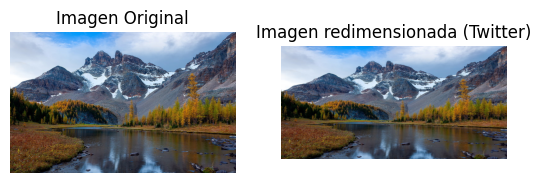

In [3]:
fotoapp.look_image('/content/paisaje.jpg', 'Twitter')

In [ ]:
#fotoapp.equal_robot('robot.jpg')

In [ ]:
#fotoapp.equal_sotano('sotano.jpg')

In [ ]:
#fotoapp.seleccion_filtro()

In [ ]:
#fotoapp.funcion_para_elegir()